哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [20]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [21]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
dataA=pd.read_csv("A_lvr_land_A.csv")
dataB=pd.read_csv("B_lvr_land_A.csv")
dataE=pd.read_csv("E_lvr_land_A.csv")
dataF=pd.read_csv("F_lvr_land_A.csv")

In [22]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
dataA.drop(index=0,inplace=True)
dataB.drop(index=0,inplace=True)
dataE.drop(index=0,inplace=True)
dataF.drop(index=0,inplace=True)

In [23]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
dataA["city"]="Taipei"
dataB["city"]="Taichung"
dataE["city"]="Kaohsiung"
dataF["city"]="New_Taipei"
# shape_A=dataA.shape
# shape_B=dataB.shape
# shape_E=dataE.shape
# shape_F=dataF.shape

In [24]:
#4. 將以上四份資料運用pd.concat()串接
data=pd.concat([dataA,dataB,dataE,dataF],ignore_index=True)
data.head(3)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [25]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city',
                    'towns',
                    'main_use',
                    'use_zoning',
                    'total_price',
                    'building_area_square_meter',
                    'main_building_area',
                    'tx_dt',
                    'unit_price',
                    'room_number',
                    'hall_number',
                    'health_number']

columns_type = {'total_price': 'int',
                'unit_price':'float',
                'building_area_square_meter':'float',
                'main_building_area': 'float',
                'room_number': 'int',
                'hall_number': 'int',
                'health_number': 'int'}

In [26]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
#Rename
data.rename(mapper=columns_mapping,axis=1,inplace=True)

In [27]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())

#extract "住家用" in column "main_use" and "住" in column "use_zoning"
data2=data[(data["main_use"]=="住家用") & (data["use_zoning"]=="住")]
data2=data2.dropna(subset=analysis_columns)

In [28]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
data2=data2.astype(columns_type)

In [29]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
        
data2["tx_dt_year"]=data2["tx_dt"].apply(lambda x: x[0:-4])
data2["tx_dt_year"].head(5)
mask1=data2["tx_dt_year"]=="109"
mask2=(data2["room_number"]>=1) & (data2["room_number"]<=5)
mask3=(data2["hall_number"]>=1) & (data2["hall_number"]<=2)
mask=(mask1) & (mask2) & (mask3)
data3=data2[mask].reset_index()
data3=data3.loc[:,analysis_columns]
print('shape of new data = ',data3.shape)

shape of new data =  (6894, 12)


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [30]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
data3["building_area_square_feet"]=data3["building_area_square_meter"].apply(lambda x: 0.3025*x)
data3["main_building_area_square_feet"]=data3["main_building_area"].apply(lambda x: 0.3025*x)
data3["unit_price_square_feet"]=data3["unit_price"].apply(lambda x: 0.3025*x)

In [31]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
data3.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,36.817907,24.831217,28545.313027
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,19.018693,11.302358,17640.986646
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,0.293425,0.000000,0.000000
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,25.096912,18.356456,16193.505625
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,33.090475,23.894475,24082.025000
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,44.624044,28.978744,35915.295625
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,184556.460000


In [32]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
print("可能因為有些欄位數值為0卻並非nan，所以dropna的時候沒有被排出掉")
mask_0=(data3["main_building_area"]!=0) & (data3["unit_price"]!=0)
data4=data3[mask_0]
data4.describe()

可能因為有些欄位數值為0卻並非nan，所以dropna的時候沒有被排出掉


,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,36.834942,24.976132,28600.907039
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,19.011854,11.174478,17658.343822
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,2.250600,2.250600,979.797500
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,25.111281,18.471406,16213.168125
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,33.095012,23.930775,24122.106250
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,44.602112,29.030925,35961.200000
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,184556.460000


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [33]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
mask4=(data4["city"]=="Taipei")
data_taipei=data4[mask4]
corr_taipei=data_taipei.corr()
corr_taipei
corr_with_total_price=corr_taipei["total_price"].sort_values(ascending=False)

corr_with_unit_price_square_feet=corr_taipei["unit_price_square_feet"].sort_values(ascending=False)


print("Strongest correlation with 'total_price' = \n{0}".format(corr_with_total_price.index[1]))
print()
print("Strongest correlation with 'unit_price_square_feet' = \n{0}".format(corr_with_unit_price_square_feet.index[0]))


Strongest correlation with 'total_price' = 
building_area_square_feet

Strongest correlation with 'unit_price_square_feet' = 
unit_price


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

unit_price_square_feet 中位數最高的是 Taipei,數值為 49087.431249999994


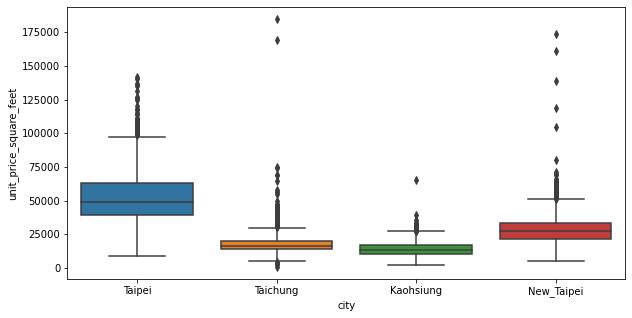

In [34]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig,axs=plt.subplots(1,1,figsize=(10,5))
ax2=sns.boxplot(data=data4,x="city",y="unit_price_square_feet",ax=axs)

groupby_city=data4.groupby("city")
get_median=groupby_city.median()
max_value=get_median["unit_price_square_feet"].max()
max_city=get_median["unit_price_square_feet"][get_median["unit_price_square_feet"]==max_value].index[0]
print("unit_price_square_feet 中位數最高的是 {0},數值為 {1}".format(max_city,max_value))

total_price中位數最高的對應房間數為 5


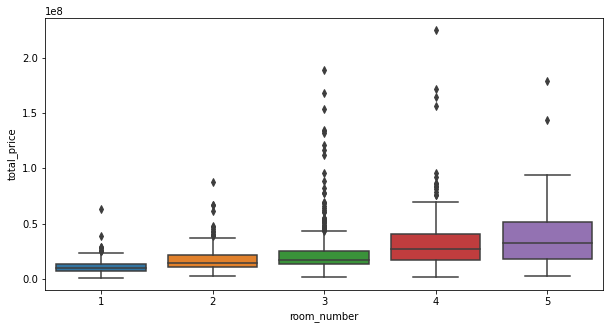

In [35]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
fig,axs=plt.subplots(1,1,figsize=(10,5))
taipei_data=data4[data4["city"]=="Taipei"]
sns.boxplot(data=taipei_data,x="room_number",y="total_price")

groupby_room_number=taipei_data.groupby("room_number").median()
max_value=groupby_room_number["total_price"].max()
index=(groupby_room_number[groupby_room_number["total_price"]==max_value]).index[0]
print("total_price中位數最高的對應房間數為 {0}".format(index))

unit_price_square_feet 中位數最高的對應地區為 ['大安區']


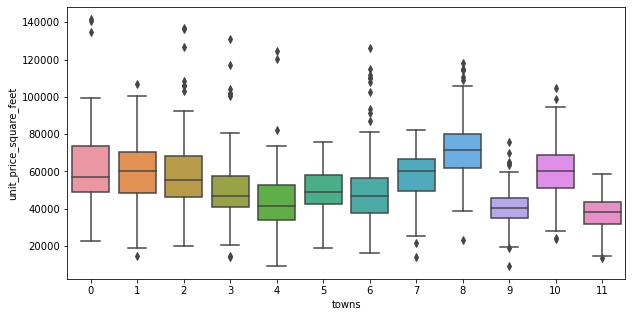

In [36]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
taipei_data=data4[data4["city"]=="Taipei"]
le.fit(taipei_data["towns"])
taipei_data.loc[:,["towns"]]=le.transform(taipei_data["towns"])
fig2,axs2=plt.subplots(1,1,figsize=(10,5))
sns.boxplot(data=taipei_data,x="towns",y="unit_price_square_feet",ax=axs2)

groupby_towns=taipei_data.groupby("towns").median()
max_value=groupby_towns["unit_price_square_feet"].max()
index=(groupby_towns[groupby_towns["unit_price_square_feet"]==max_value]).index[0]
index2=le.inverse_transform([index])
print("unit_price_square_feet 中位數最高的對應地區為 {0}".format(index2))